In [1]:
from PIL import Image
image_path = 'basemodelado.jpeg'
image = Image.open(image_path)

bw_image = image.convert('L')

bw_image.save('basemodelado_bw.jpeg')
bw_image.show()


In [2]:
bw_image.size


(960, 1280)

In [3]:
import numpy as np
bw_array = np.array(bw_image)


bw_array.shape

(1280, 960)

In [4]:
bw_image.show()

In [5]:
from PIL import Image
import numpy as np

image_path = 'basemodelado_bw.jpeg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)


threshold = 100  
target_points = np.column_stack(np.where(image_array < threshold))
#target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))  

print("Total puntos objetivo:", target_points.shape[0])


Total puntos objetivo: 21191


In [6]:
target_points

array([[ 127,  367],
       [ 127,  433],
       [ 127,  654],
       ...,
       [1154,  437],
       [1154,  438],
       [1155,  437]])

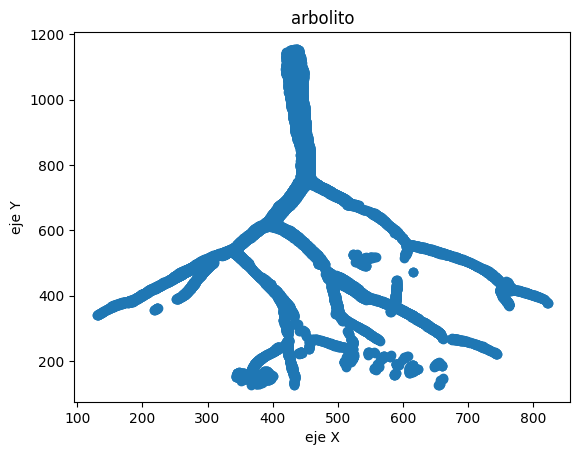

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = target_points[:, 0]  
x = target_points[:, 1]  
plt.scatter(x, y)
plt.xlabel('eje X')
plt.ylabel('eje Y')
plt.title('arbolito')
plt.show()

In [18]:
from treesim import gen_simtree
from scipy.optimize import least_squares
import numpy as np

max_vals = np.max(target_points, axis=0)
max_vals[max_vals == 0] = 1  

target_points_normalized = target_points / max_vals

print(target_points_normalized)

def error_func(params, target_points, generated_points): #Obtener parámetros y datos con todos los componentes
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params

    transformed_points = generated_points * scale
    transformed

generated_points = gen_simtree(Np=target_points.shape[0])

def error_func(params, target_points, generated_points):
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params

    transformed_points = generated_points * scale
    transformed_points[:, 0] += tx
    transformed_points[:, 1] += ty
    transformed_points[:, 2] += tz

  
    error = transformed_points - target_points
    return np.ravel(error)


initial_params = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


generated_points_xyz = generated_points[:, :3]  


result = least_squares(error_func, initial_params, args=(target_points, generated_points_xyz))


final_params = result.x


ImportError: cannot import name 'gen_simtree' from 'treesim' (/home/claire/Documents/modelado/Tree-Branch-Modeling/treesim.py)

In [ ]:
target_points

In [ ]:
final_params

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def rotate_x(theta):
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotate_y(theta):
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def rotate_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Angles of rotation (in radians)
theta_x = np.pi / 2 # 45 degrees
theta_y = np.pi / 2 # 30 degrees
theta_z = np.pi / 1  # 60 degrees

# Rotation matrices
R_x = rotate_x(theta_x)
R_y = rotate_y(theta_y)
R_z = rotate_z(theta_z)

# Example points
target_points = target_points

# Apply the rotations
rotated_points = target_points @ R_x.T
rotated_points = rotated_points @ R_y.T
rotated_points = rotated_points @ R_z.T

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], color='blue', label='Original Points')

# Rotated points
ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2], color='red', label='Rotated Points')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('3D Rotation of Points')
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
pip install plotly

In [ ]:
pip install scikit-learn

In [10]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
rotated_points_scaled = scaler.fit_transform(rotated_points)


num_points = 20000  
random_points_scaled = np.random.rand(num_points, 3)


X = random_points_scaled


Y = rotated_points_scaled[:num_points]  
W = np.linalg.pinv(X) @ Y


predicted_points_scaled = X @ W


predicted_points = scaler.inverse_transform(predicted_points_scaled)

# Plotly
fig = go.Figure()

# rotated_points
fig.add_trace(go.Scatter3d(
    x=rotated_points[:, 0], y=rotated_points[:, 1], z=rotated_points[:, 2],
    mode='markers',
    marker=dict(size=3, color='red'),
    name='Rotated Points'
))

# prediction
fig.add_trace(go.Scatter3d(
    x=predicted_points[:, 0], y=predicted_points[:, 1], z=predicted_points[:, 2],
    mode='markers',
    marker=dict(size=3, color='green'),
    name='Predicted Points'
))


fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='Mínimos Cuadrados: Visualización Interactiva',
    showlegend=True
)


fig.show()




NameError: name 'rotated_points' is not defined

In [11]:
for i in target_points:
    print(i)

[127 367]
[127 433]
[127 654]
[128 433]
[128 655]
[128 656]
[129 379]
[129 433]
[129 656]
[129 657]
[130 376]
[130 379]
[130 433]
[130 657]
[131 374]
[131 375]
[131 376]
[131 433]
[132 374]
[132 375]
[132 376]
[132 433]
[133 372]
[133 375]
[133 376]
[133 433]
[134 372]
[134 375]
[134 383]
[134 433]
[135 372]
[135 373]
[135 374]
[135 375]
[135 383]
[135 433]
[136 370]
[136 371]
[136 373]
[136 374]
[136 375]
[136 383]
[136 384]
[136 433]
[137 370]
[137 371]
[137 372]
[137 373]
[137 374]
[137 375]
[137 384]
[137 385]
[137 433]
[138 368]
[138 370]
[138 371]
[138 372]
[138 373]
[138 374]
[138 375]
[138 384]
[138 385]
[138 433]
[139 366]
[139 367]
[139 368]
[139 369]
[139 370]
[139 371]
[139 372]
[139 373]
[139 374]
[139 375]
[139 385]
[139 386]
[139 433]
[140 352]
[140 365]
[140 366]
[140 367]
[140 371]
[140 372]
[140 373]
[140 374]
[140 385]
[140 386]
[140 387]
[141 364]
[141 366]
[141 367]
[141 371]
[141 372]
[141 373]
[141 374]
[141 385]
[141 386]
[141 387]
[141 392]
[141 393]
[141 657]


In [12]:
generated_points

NameError: name 'generated_points' is not defined

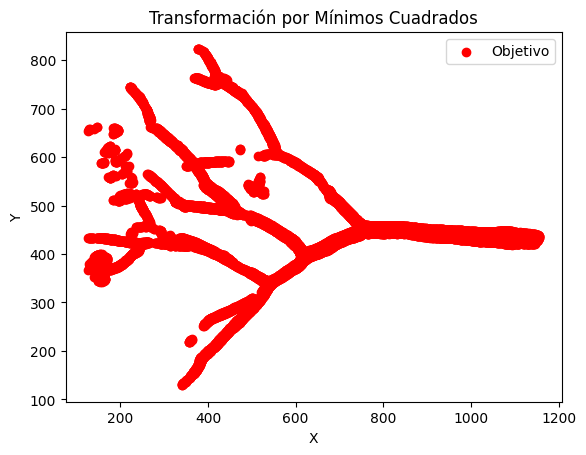

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos generados (ejemplo aleatorio)
# Generar puntos aleatorios del mismo tamaño que puntos_objetivo
np.random.seed(42)
puntos_objetivo = target_points
puntos_generados = np.random.uniform(0, 500, (len(puntos_objetivo), 2))



# Si el número de puntos no coincide, seleccionamos un subconjunto
n_objetivo = len(puntos_objetivo)
puntos_generados = puntos_generados[:n_objetivo]

# Matrices para el sistema de ecuaciones
# Extender puntos generados con una columna de 1 para incluir la traslación (b)
P_extendido = np.hstack([puntos_generados, np.ones((n_objetivo, 1))])  # (n x 3)

# Resolver el sistema lineal: X_objetivo = P_extendido @ [A | b]
params, _, _, _ = np.linalg.lstsq(P_extendido, puntos_objetivo, rcond=None)

# Extraer A (2x2) y b (2,)
A = params[:2, :]  # Coeficientes de transformación lineal
b = params[2, :]   # Vector de traslación

# Aplicar transformación
puntos_ajustados = (puntos_generados @ A) + b

# Visualización

plt.scatter(puntos_objetivo[:, 0], puntos_objetivo[:, 1], label="Objetivo", color="red")

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Transformación por Mínimos Cuadrados")
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


# Generar puntos aleatorios
generated_x = np.random.uniform(x_min, x_max, num_puntos)
generated_y = np.random.uniform(y_min, y_max, num_puntos)

# Ordenar los puntos generados por x para cumplir con el requisito de los splines cúbicos
sorted_indices = np.argsort(generated_x)
generated_x_sorted = generated_x[sorted_indices]
generated_y_sorted = generated_y[sorted_indices]

generated_y_sorted += np.linspace(0, 0.1, num_puntos)
# Mostrar los puntos generados
for i in range(num_puntos):
    print(f"Punto {i+1}: x={generated_x[i]}, y={generated_y[i]}")

# Supón que estos son los puntos objetivo a los que quieres ajustar los generados
# Por ejemplo, pueden ser valores específicos, o también podrías generar estos aleatoriamente
# Aquí estoy generando puntos objetivo para tener un ejemplo
target_x = np.random.uniform(x_min, x_max, num_puntos)
target_y = np.random.uniform(y_min, y_max, num_puntos)

# Ahora realizamos el ajuste de splines cúbicos
spline_x = CubicSpline(generated_x_sorted, target_x[sorted_indices], bc_type='natural')
spline_y = CubicSpline(generated_y_sorted, target_y[sorted_indices], bc_type='natural')

# Aplicar los splines a los puntos generados
adjusted_x = spline_x(generated_x_sorted)
adjusted_y = spline_y(generated_y_sorted)

# Visualizar los puntos generados y ajustados
plt.scatter(generated_x_sorted, generated_y_sorted, color='blue', alpha=0.6, label='Puntos generados')
plt.scatter(adjusted_x, adjusted_y, color='green', alpha=0.6, label='Puntos ajustados')
plt.scatter(target_x, target_y, color='red', alpha=0.6, label='Puntos objetivo')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Puntos Generados, Objetivos y Ajustados con Splines Cúbicos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


Punto 1: x=-752.7592869158252, y=-1889.202426968282
Punto 2: x=2704.2858384594974, y=251.40568427014887
Punto 3: x=1391.9636508684307, y=2237.67501525845
Punto 4: x=591.9509051822197, y=1393.3493184573672
Punto 5: x=-2063.888157345381, y=1839.3668871686987
Punto 6: x=-2064.032877982784, y=952.7002002643039
Punto 7: x=-2651.4983269908034, y=1153.6593871071145
Punto 8: x=2197.056874649611, y=2095.173909391916
Punto 9: x=606.6900704592526, y=-1501.9919468448843
Punto 10: x=1248.4354667762727, y=-63.450218141157166
Punto 11: x=-2876.4930342251855, y=-1672.7433490823867
Punto 12: x=2819.4591129719656, y=2926.0080479798817
Punto 13: x=1994.6558448025307, y=2664.3560381196794
Punto 14: x=-1725.9653359303431, y=-2763.4391317889645
Punto 15: x=-1909.0501967573962, y=1233.451035094131
Punto 16: x=-1899.572940879397, y=2551.489904493995
Punto 17: x=-1174.5465422427737, y=-1916.5479292359987
Punto 18: x=148.53858979342704, y=407.6713833157769
Punto 19: x=-408.3298881473056, y=2492.929785528251
Pun

ValueError: `x` must be strictly increasing sequence.

In [ ]:
'''import numpy as np
from scipy.optimize import curve_fit


# Función de simulación ajustable con verificación de la forma de la salida
def simulacion_ajustada(x, *params):
    model_params = {
        'height_range': [params[0], params[1]],
        'diam_range': [params[2], params[3]],
        'split_prob': params[4],
    }
    puntos = gen_simtree(model_params=model_params)
    result = np.full(x.shape, np.mean(puntos[:, 2]), dtype=np.float64)

    print("Forma de la salida de simulacion_ajustada:", result.shape)
    print("Tipo de datos de la salida:", result.dtype)
    return result


params_iniciales = [30, 50, 0.5, 1, 0.5]

# Reducir `xdata` y `target_points_normalized` a un solo valor para pruebas
xdata = np.array([0], dtype=np.float64)
target_points_normalized = np.array([1.0], dtype=np.float64)  # Ajuste simple a un solo valor objetivo

# Ajuste de los parámetros
opt_params, _ = curve_fit(simulacion_ajustada, xdata, target_points_normalized, p0=params_iniciales)
print(f"Parámetros óptimos: {opt_params}")'''



